<a href="https://colab.research.google.com/github/ThodupunooriSaiManish/Machine_Learning/blob/main/ML_Assignment_1(205).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#a
# Step (1) Loading data into memory from drive
# Dataset: Heart Disease UCI (from Kaggle)

from google.colab import drive
import pandas as pd
import numpy as np

# Loading the dataset

df=pd.read_csv('/content/drive/MyDrive/ML_Lab/Datasets/heart_disease_uci.csv')

# Displaying first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Checking the basic info (column names, missing values, data types)
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())

First 5 rows of the dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Summary Statistics:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [2]:
#a
# Step (2) Making X matrix and y vector
# Droping irrelevant columns such like objects datatypes

df = df.drop(columns=['id', 'dataset', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal' ])

# Converting target 'num' into binary form: 0 = no disease, 1 = disease for better data pre processing
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Droping old 'num' column
df = df.drop(columns=['num'])

# Defining X and y
X = df.drop(columns=['target'])
y = df['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Features (X) shape: (920, 6)
Target (y) shape: (920,)

First 5 rows of X:


,age,trestbps,chol,thalch,oldpeak,ca
0,63,145.0,233.0,150.0,2.3,0.0
1,67,160.0,286.0,108.0,1.5,3.0
2,67,120.0,229.0,129.0,2.6,2.0
3,37,130.0,250.0,187.0,3.5,0.0
4,41,130.0,204.0,172.0,1.4,0.0



First 5 values of y:
0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64


In [3]:
#b
from sklearn.model_selection import train_test_split

#Splitting into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Dropping the rows with missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # keeping  alignment

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Train set size: 250
Test set size: 58
Shape of X_train: (250, 6)
Shape of X_test: (58, 6)


In [4]:
#c
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L2 regularization
# C is the inverse of λ (regularization strength in scikit-learn)
# Smaller C → stronger regularization
log_reg = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=1000)

# Fitting the  model on training data
log_reg.fit(X_train, y_train)

# Print objective components
print("Intercept (b):", log_reg.intercept_)
print("Weights (w):", log_reg.coef_)


Intercept (b): [4.02203716]
Weights (w): [[-2.52036080e-02  1.05982264e-02  5.31734227e-04 -3.74628698e-02
   5.39636130e-01  1.28899897e+00]]


In [5]:
#d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

#Defining the λ values to try
lambdas = [0, 0.1, 1, 10, 100, 1000]

#Converting to scikit-learn’s C (inverse of λ)
C_values = [np.inf if l == 0 else 1.0/l for l in lambdas]

#Providing storage for results
train_losses = []
test_losses = []
weight_norms = []
weight_values = []
train_accs = []
test_accs = []

#Training Logistic Regression for each λ
for C, lam in zip(C_values, lambdas):
    #Logistic regression with L2 regularization
    log_reg = LogisticRegression(
        penalty="l2",
        C=C,
        solver="lbfgs",
        max_iter=1000
    )

    #Training the model
    log_reg.fit(X_train, y_train)

    #Predictions (probabilities for cross-entropy)
    y_train_proba = log_reg.predict_proba(X_train)
    y_test_proba = log_reg.predict_proba(X_test)

    #Computing Cross-Entropy (Log Loss)
    train_losses.append(log_loss(y_train, y_train_proba))
    test_losses.append(log_loss(y_test, y_test_proba))

    #L2 Norm of weight vector
    weight_norms.append(np.linalg.norm(log_reg.coef_))

    #Store actual weight values (for plotting)
    weight_values.append(log_reg.coef_[0])

    #Accuracy
    train_accs.append(accuracy_score(y_train, log_reg.predict(X_train)))
    test_accs.append(accuracy_score(y_test, log_reg.predict(X_test)))

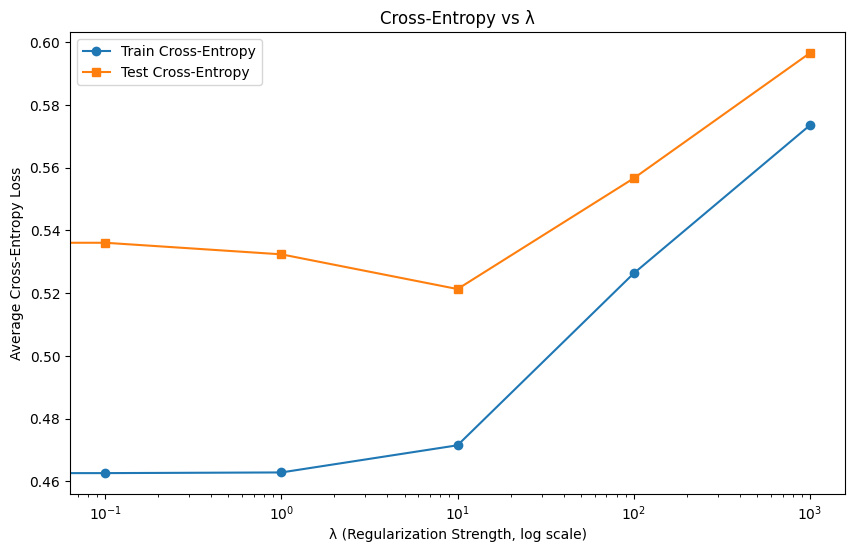

In [6]:
#Plot Results
#Plot 1: Cross-entropy vs λ

plt.figure(figsize=(10,6))
plt.plot(lambdas, train_losses, marker='o', label="Train Cross-Entropy")
plt.plot(lambdas, test_losses, marker='s', label="Test Cross-Entropy")
plt.xscale("log")
plt.xlabel("λ (Regularization Strength, log scale)")
plt.ylabel("Average Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
plt.show()

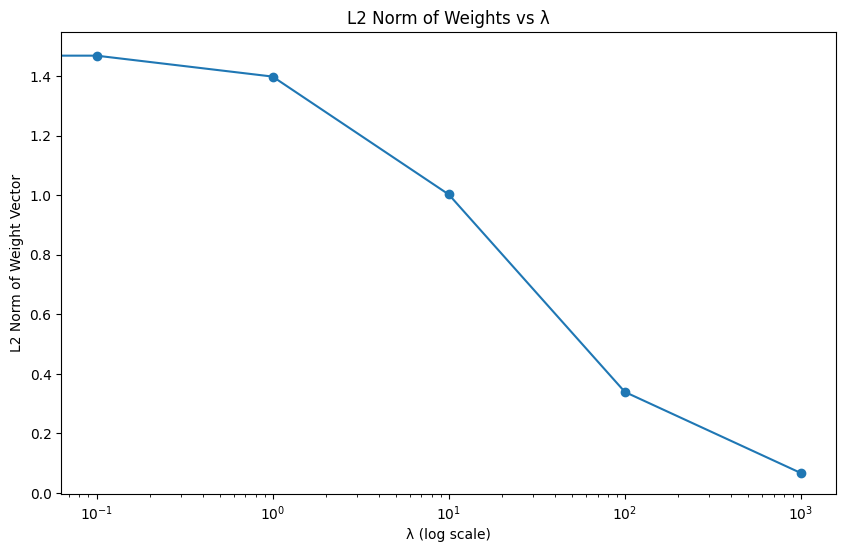

In [7]:
# Plot 2: Weight norm vs λ
plt.figure(figsize=(10,6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weight Vector")
plt.title("L2 Norm of Weights vs λ")
plt.show()

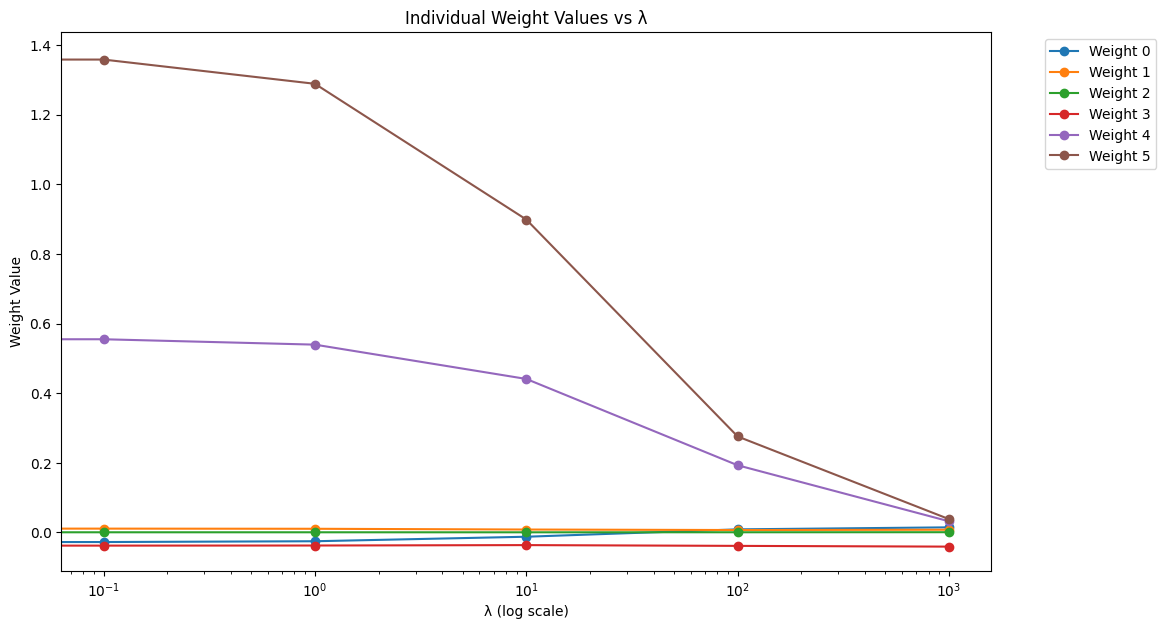

In [8]:
# Plot 3: Actual weights vs λ
plt.figure(figsize=(12,7))
weight_values = np.array(weight_values)  # shape = (len(lambdas), num_features)
for j in range(weight_values.shape[1]):
    plt.plot(lambdas, weight_values[:, j], marker='o', label=f"Weight {j}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Value")
plt.title("Individual Weight Values vs λ")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

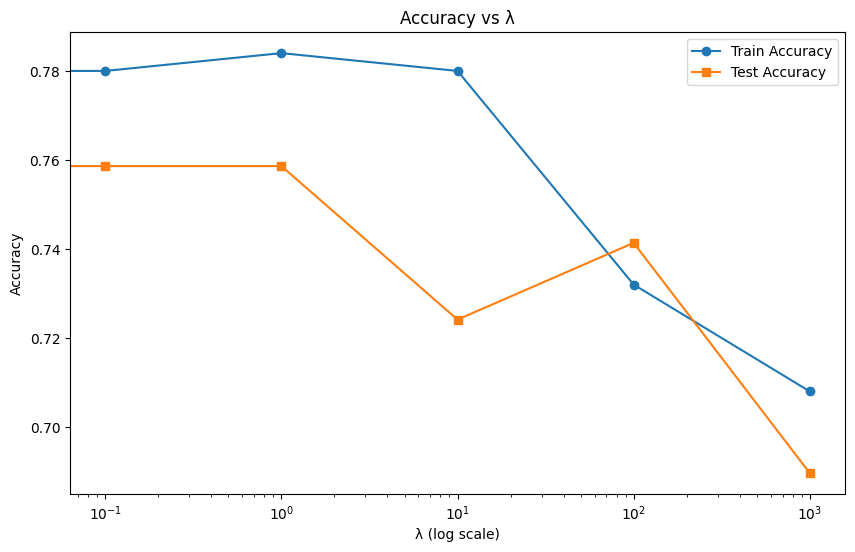

In [9]:
# Plot 4: Accuracy vs λ
plt.figure(figsize=(10,6))
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='s', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.show()

In [10]:
#Part(e) - Half 1: Running the models

def gaussian_basis_transform(X, sigma=1.0, n_basis=5):
    """
    Expands each feature in X into Gaussian basis functions.
    Means are evenly spaced between -10 and 10.
    """
    means = np.linspace(-10, 10, n_basis)
    X_new = []
    for col in X.values.T:   # loops the data through each feature column
        feats = [np.exp(-(col - m)**2 / (2 * sigma**2)) for m in means]
        X_new.append(np.array(feats).T)
    return np.hstack(X_new)

#Trying different σ values
sigmas = [0.1, 0.5, 1, 5, 10]

#Dictionary to store all results for each σ
results = {}

for sigma in sigmas:
    print(f"Running for σ = {sigma}")

    #Transforming data
    X_train_g = gaussian_basis_transform(X_train, sigma)
    X_test_g = gaussian_basis_transform(X_test, sigma)

    train_losses, test_losses, train_accs, test_accs = [], [], [], []

    #Training logistic regression with different λ
    for C, lam in zip(C_values, lambdas):
        log_reg = LogisticRegression(
            penalty="l2", C=C, solver="lbfgs", max_iter=1000
        )
        log_reg.fit(X_train_g, y_train)

        #Predictions
        ytr_p = log_reg.predict_proba(X_train_g)[:,1]
        yte_p = log_reg.predict_proba(X_test_g)[:,1]

        #Loss & Accuracy
        train_losses.append(log_loss(y_train, ytr_p))
        test_losses.append(log_loss(y_test, yte_p))
        train_accs.append(accuracy_score(y_train, log_reg.predict(X_train_g)))
        test_accs.append(accuracy_score(y_test, log_reg.predict(X_test_g)))

    results[sigma] = {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accs": train_accs,
        "test_accs": test_accs
    }

Running for σ = 0.1
Running for σ = 0.5
Running for σ = 1
Running for σ = 5
Running for σ = 10


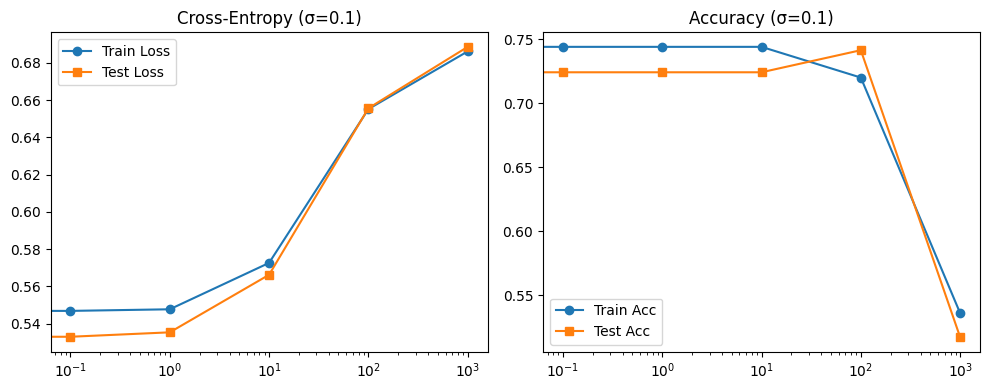

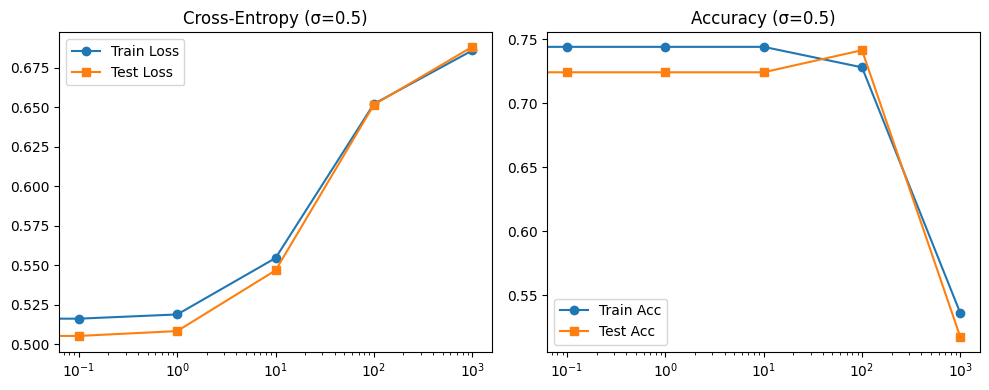

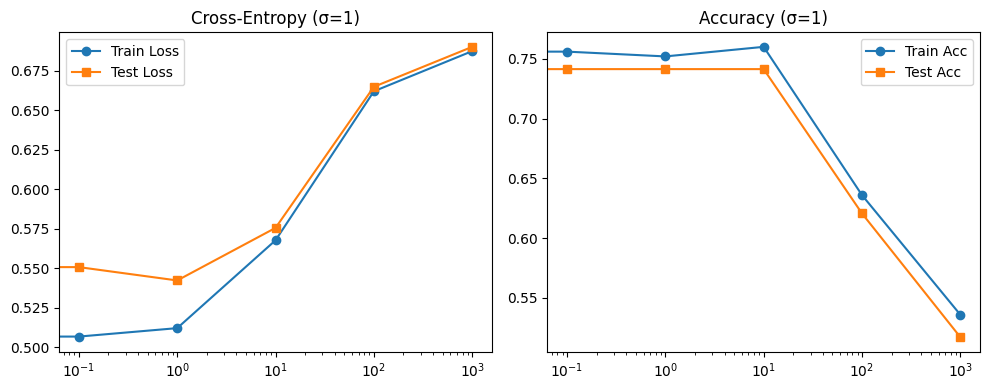

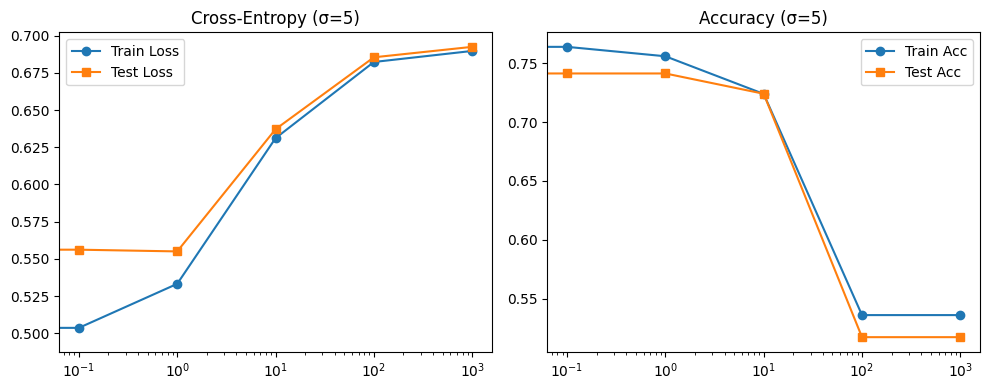

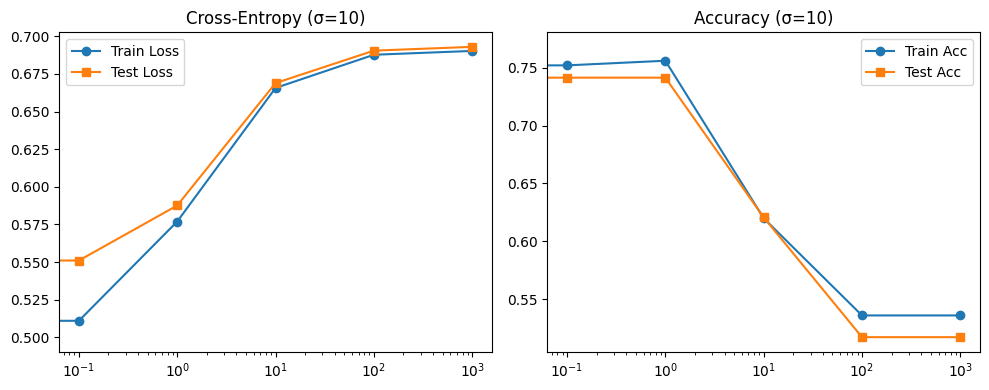

In [11]:
#Part(e) - Half 2: Plot results

for sigma in sigmas:
    res = results[sigma]

    plt.figure(figsize=(10,4))
    #Cross-Entropy
    plt.subplot(1,2,1)
    plt.plot(lambdas, res["train_losses"], '-o', label="Train Loss")
    plt.plot(lambdas, res["test_losses"], '-s', label="Test Loss")
    plt.xscale("log")
    plt.title(f"Cross-Entropy (σ={sigma})")
    plt.legend()

    #Accuracy
    plt.subplot(1,2,2)
    plt.plot(lambdas, res["train_accs"], '-o', label="Train Acc")
    plt.plot(lambdas, res["test_accs"], '-s', label="Test Acc")
    plt.xscale("log")
    plt.title(f"Accuracy (σ={sigma})")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [12]:
#f
#Converting DataFrames to NumPy
X_train_np = X_train.values
X_test_np = X_test.values

#Trying different σ values
sigmas = [0.1, 0.5, 1, 5, 10]

train_errors = []
test_errors = []

for sigma in sigmas:
    # Gaussian basis transform
    def gaussian_basis(X, sigma):
        X_new = []
        for j in range(X.shape[1]):
            means = np.linspace(-10, 10, 5)   # 5 Gaussians per feature
            for m in means:
                X_new.append(np.exp(-(X[:, j] - m)**2 / (2 * sigma**2)))
        return np.array(X_new).T

    X_train_g = gaussian_basis(X_train_np, sigma)
    X_test_g = gaussian_basis(X_test_np, sigma)

    # Logistic regression without regularization
    model = LogisticRegression(penalty=None, max_iter=1000)  # <-- FIXED
    model.fit(X_train_g, y_train)

    # Errors (1 - accuracy)
    train_errors.append(1 - accuracy_score(y_train, model.predict(X_train_g)))
    test_errors.append(1 - accuracy_score(y_test, model.predict(X_test_g)))

# Reference: plain logistic regression (from part c)
plain_model = LogisticRegression(penalty=None, max_iter=1000)  # <-- FIXED
plain_model.fit(X_train_np, y_train)
ref_train_error = 1 - accuracy_score(y_train, plain_model.predict(X_train_np))
ref_test_error = 1 - accuracy_score(y_test, plain_model.predict(X_test_np))


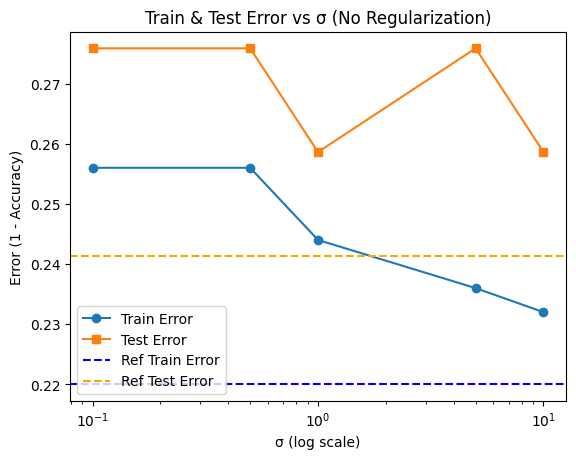

In [13]:
# Plot
plt.plot(sigmas, train_errors, '-o', label="Train Error")
plt.plot(sigmas, test_errors, '-s', label="Test Error")
plt.axhline(ref_train_error, color="blue", linestyle="--", label="Ref Train Error")
plt.axhline(ref_test_error, color="orange", linestyle="--", label="Ref Test Error")
plt.xscale("log")
plt.xlabel("σ (log scale)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Train & Test Error vs σ (No Regularization)")
plt.legend()
plt.show()

In [14]:
#g
# Gaussian Basis Function
def gaussian_basis(X, sigmas):
    X_new = []
    for sigma in sigmas:
        for j in range(X.shape[1]):
            for m in [-2, 0, 2]:   # only 3 centers per feature
                X_new.append(np.exp(-(X[:, j]-m)**2/(2*sigma**2)))
    return np.array(X_new).T

# σ values and λ values
sigmas = [0.1, 0.5, 1, 5, 10]
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
C_values = [np.inf if l==0 else 1/l for l in lambdas]

# Transforming data with all σ
X_train_all = gaussian_basis(X_train.values, sigmas)
X_test_all  = gaussian_basis(X_test.values, sigmas)

train_err, test_err, w_norm = [], [], []
w_norm_sigma = {s: [] for s in sigmas}

# Training each λ
for lam, C in zip(lambdas, C_values):
    model = LogisticRegression(penalty="l2", C=C, solver="lbfgs", max_iter=2000)
    model.fit(X_train_all, y_train)

    # Errors
    train_err.append(log_loss(y_train, model.predict_proba(X_train_all)))
    test_err.append(log_loss(y_test, model.predict_proba(X_test_all)))

    # Weight norms
    W = model.coef_[0]
    w_norm.append(np.linalg.norm(W))

    block_size = X_train.shape[1]*3  # since we considered 3 centers per feature
    for i, s in enumerate(sigmas):
        w_norm_sigma[s].append(np.linalg.norm(W[i*block_size:(i+1)*block_size]))

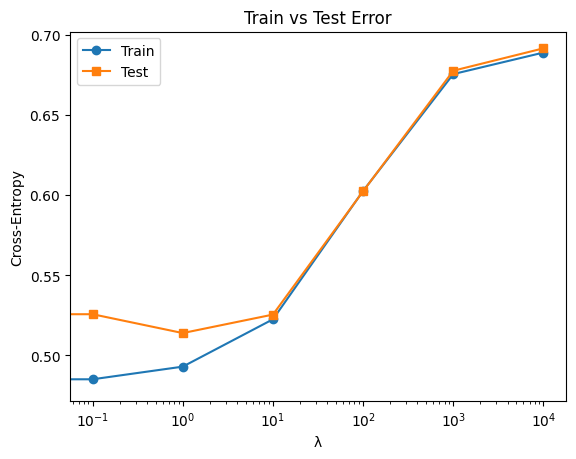

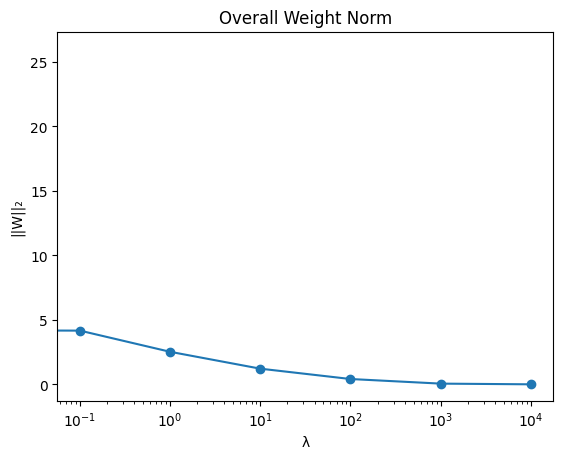

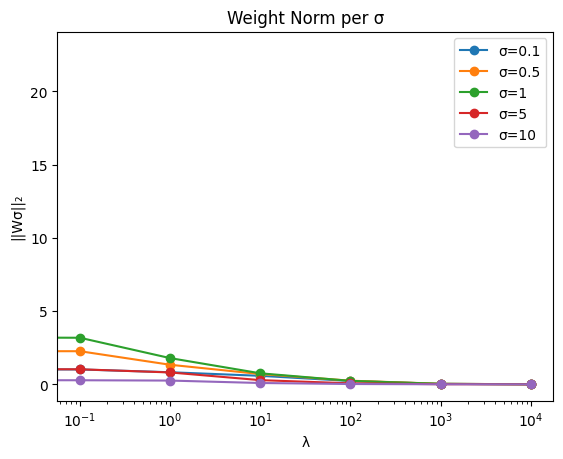

In [15]:
# --- Plots ---
plt.plot(lambdas, train_err, '-o', label="Train")
plt.plot(lambdas, test_err, '-s', label="Test")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("Cross-Entropy")
plt.title("Train vs Test Error"); plt.legend(); plt.show()

plt.plot(lambdas, w_norm, '-o')
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("||W||₂")
plt.title("Overall Weight Norm"); plt.show()

for s in sigmas:
    plt.plot(lambdas, w_norm_sigma[s], '-o', label=f"σ={s}")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("||Wσ||₂")
plt.title("Weight Norm per σ"); plt.legend(); plt.show()

#Part H

If we only use Gaussian basis functions on each input separately, the model can capture patterns in single features, but it misses the relationships between inputs.
To capture those relationships, we would design multivariate Gaussian basis functions that depend on two or more inputs at the same time. For example, instead of looking only at x1 or x2 individually, a basis function could be built around (x, x2) together. This allows the model to represent interactions between features.

**Impact on bias-variance trade-off:**

1.   Adding these interaction-based Gaussians makes the model more powerful and flexible → bias decreases (the model can fit the data better).

2.   But it also makes the model more complex → variance increases (the model can overfit if data is limited).

1.   So, we get better expressiveness, but we must use regularization (like L2 penalty) to keep the model from overfitting.

**In simple words**

Using multivariate Gaussian basis functions helps the model learn feature interactions, but it comes with a higher risk of overfitting, so bias goes down and variance goes up.

#Part I
**Learning Algorithm with Adaptive Gaussian Basis Functions**

So far, we fixed the placement of our Gaussian basis functions (centers μᵢ spaced evenly between –10 and 10). But this is restrictive such that the data might have patterns that do not align well with those fixed centers. A more flexible idea is to learn both the weight vector w and the basis function centers μᵢ from the data itself, while keeping the width σ fixed.

**How this works:**

**1. Model Setupt**

 i) Each input x is transformed using Gaussian basis functions:

  ϕᵢ(x) = exp(−(x − μᵢ)² / (2σ²))

 ii) Predictions are made using a linear model:

  ŷ = wᵀϕ(x)

**2. Loss Function**

 i) We use the standard error function (e.g., cross-entropy or squared error), plus an L2 penalty on the weights:

  L(w, μ) = Error(y, ŷ) + λ‖w‖²

**3. Learning Algorithm (Iterative)**

 i) Initialize μᵢ (for example, spread them evenly at the start).

 ii) Repeat until convergence:

  * Update weights w using gradient descent (similar to normal regression with regularization).

  * Update the centers μᵢ by computing the gradient of the loss with respect to each μᵢ and shifting them slightly in the direction that reduces the error.

**4. Intuition**

 i) Over time, the μᵢ values “move” to positions in the input space that better represent the data distribution.

 ii) The model adapts its basis functions instead of relying on a fixed placement.

**Impact on Bias–Variance Trade-off**

 i) Bias decreases: The model becomes more flexible and can fit the data better, since basis functions adjust to the data.

 ii) Variance increases: With more flexibility, the model risks overfitting, especially if too many basis functions are used or regularization is weak.

 iii) Regularization (λ) helps control this trade-off by limiting how large the weights w can grow.

**In simple way:** Learning μᵢ makes the model more powerful, but we need regularization to avoid overfitting.

In [ ]:
#PesudoCode

#Initialize mu_j (j=1..M) by k-means on {x_i}
#for t in 0..T-1:
    #compute Phi_ij = exp(-||x_i - mu_j||^2/(2 sigma^2))
    #fit logistic regression on Phi to get w, b (with L2 λ)
    #compute p_i = sigmoid(w^T Phi_i + b) for all i
    #for each center k:
        #grad_mu_k = (1/N) * sum_i (p_i - y_i) * w_k * Phi_ik * (x_i - mu_k) / sigma^2
        #mu_k = mu_k - eta * grad_mu_k
    #check convergence and break if small change

#Part J
**Convergence of the Algorithm**

When we allow both the weights w and the centers μᵢ of the Gaussian basis functions to be learned, the optimization problem becomes non-convex.

 i) For w (weights):

  * If μᵢ are fixed, the problem is convex.

  * Gradient descent or closed-form methods will always converge to the global optimum for w.

 ii) For μᵢ (centers):

  * Once we start updating μᵢ as well, the error surface becomes highly non-convex.

  * This means the algorithm can converge, but only to a local optimum, not necessarily the global one.

  * The final solution depends on the initialization of μᵢ and the learning rate used.

So, does it converge?

  * Yes, the algorithm does converge if the learning rate is chosen properly.

  * But it converges to a locally optimal solution, not a globally optimal one.

Why only local optimum?

Because moving μᵢ changes the feature space in a non-linear way, creating many possible “valleys” in the loss surface. Gradient descent will get stuck in one of those valleys, depending on the starting positions of μᵢ.

In simple words:

The algorithm converges, but we cannot guarantee it finds the best possible solution — only a good enough one.

In [16]:
#2
# Linear Regression (Regression) and Logistic Regression (Classification)
# with preprocessing steps

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# i. Linear Regression Experiment

# Loading California Housing dataset
housing = fetch_california_housing(as_frame=True)
X_housing = housing.data
y_housing = housing.target

X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Linear Regression Results (California Housing):")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Linear Regression Results (California Housing):
MSE: 0.5558915986952442
R^2: 0.575787706032451


In [18]:
# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
print("\nRidge R^2:", ridge.score(X_test_scaled, y_test))


Ridge R^2: 0.5760599032848371


In [19]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
print("Lasso R^2:", lasso.score(X_test_scaled, y_test))

Lasso R^2: 0.48136113250290735


In [20]:
# ii. Logistic Regression Experiment
# Loading Breast Cancer dataset
cancer = load_breast_cancer(as_frame=True)
X_cancer = cancer.data
y_cancer = cancer.target

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Scaling
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

In [21]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, penalty="l2")
log_reg.fit(X_train_c_scaled, y_train_c)
y_pred_c = log_reg.predict(X_test_c_scaled)

print("\nLogistic Regression Results (Breast Cancer):")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))


Logistic Regression Results (Breast Cancer):
Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



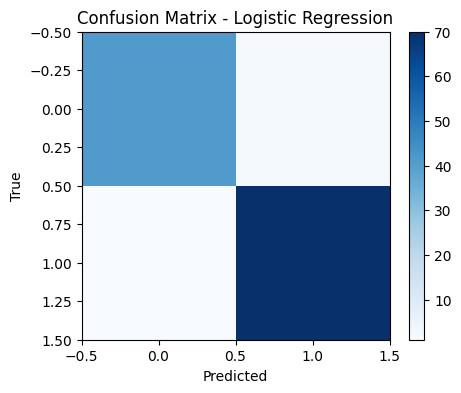

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()